In [49]:
# Importar librerías básicas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización y análisis
from pandas.plotting import scatter_matrix

# Preprocesamiento y métricas
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    mean_squared_error, r2_score
)

from sklearn.model_selection import train_test_split


### 1. Carga y estudio de la estructura del dataset

In [50]:
# Cargamos el dataset
data = pd.read_csv('loan_data.csv')

#Guardamos las variables target de clasificación y regresión
target = 'loan_status'
target_regresion = 'risk_score'

In [51]:
#Mostramos informacion relevante de las columnas 
#Mostramos la cantidad de registros y columnas
data.shape

(45000, 14)

In [52]:
#Mostramos los tipos de datos de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               45000 non-null  float64
 1   gender            45000 non-null  object 
 2   education         45000 non-null  object 
 3   income            45000 non-null  float64
 4   yrs_exp           45000 non-null  int64  
 5   ownership         45000 non-null  object 
 6   amount            45000 non-null  float64
 7   purpose           44962 non-null  object 
 8   int_rate          45000 non-null  float64
 9   percent_income    45000 non-null  float64
 10  cred_hist_length  45000 non-null  float64
 11  risk_score        45000 non-null  int64  
 12  previous_loans    45000 non-null  object 
 13  loan_status       45000 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 4.8+ MB


In [53]:
#Mostramos la cantidad de valores nulos por columna
#Describe de columnas numericas
# array_num_column = data.dtypes == dtypes.numbers
data.describe()

,age,income,yrs_exp,amount,int_rate,percent_income,cred_hist_length,risk_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,634.291556,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,366.878869,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,-637.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,77710.000000,1.000000


In [54]:
# Mostramos los primeros 5 registros
print("Mostrar los primeros 5 registros")
data.head()

Mostrar los primeros 5 registros


,age,gender,education,income,yrs_exp,ownership,amount,purpose,int_rate,percent_income,cred_hist_length,risk_score,previous_loans,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


De el estudio de la estructura del dataset hemos sacado las siguientes conclusiones:
- Los datos estan distribuidos en 45000 registros y 14 columnas
- De las cuales 9 son de tipo numerico y 5 son de tipo object

Nota para el cliente: Gracias ha este analisis exploratorio de los datos hemos podido observar que contamos con datos erroneos como por ejemplo una persona con una edad de **144 años**, otra
con una experiencia laboral de **125 años** y otra con una puntuacion de riesgo de **77710** que desvirtua los datos, por lo que en futuros pasos se procedera a limpiar los datos antes de realizar el analisis de los mismos.

### Grafico de pares
Hacemos una representacion grafica para observar la relaciones entre las multiples columnas 

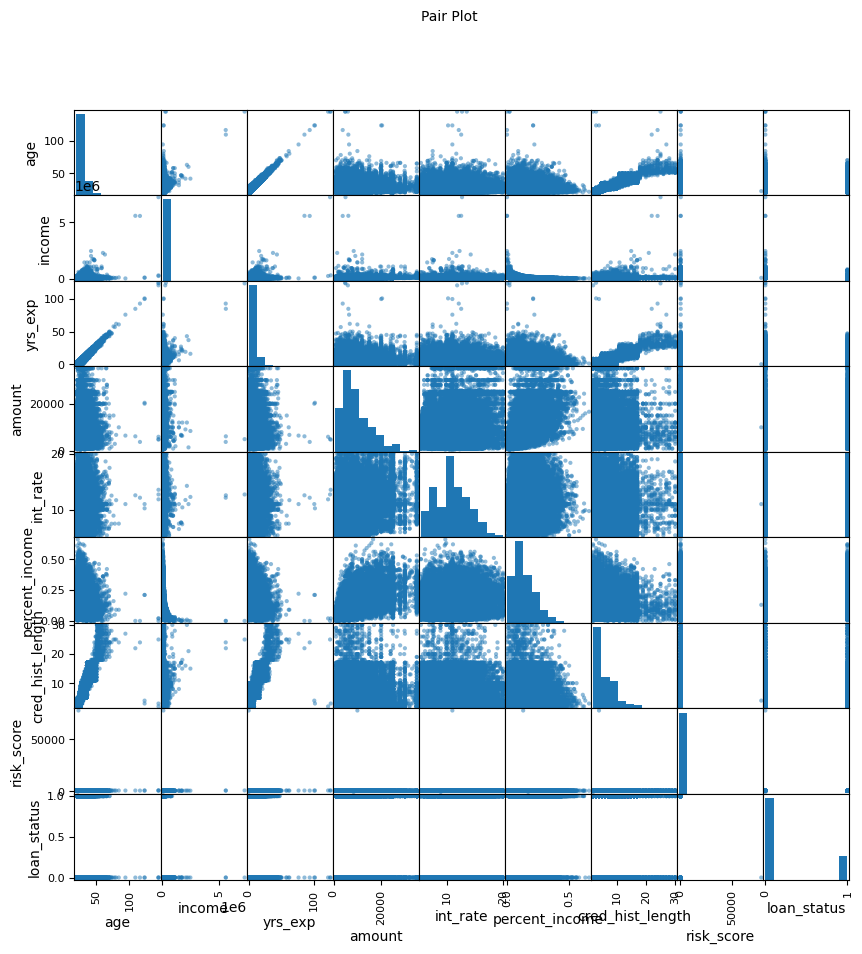

In [55]:
scatter_matrix(data, figsize=(10, 10))
plt.suptitle("Pair Plot", fontsize=10)
plt.show()

### 2. Limpieza de datos (data cleaning)
- 2.1 Deteccion de valores nulos
- 2.2 Deteccion de valores erroneos
- 2.4 Deteccion de valores erroneso mediante graficas y z-score
- 2.5 Aplicacion de tecnicas limpieza (borrado de datos, aplicacion de medias...)

In [56]:
#Deteccion de valores nulos
#Mostramos la cantidad de valores nulos por columna
null_values = data.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna")
print(null_values)

na_values = data.isna().sum().sort_values(ascending=False)
print("Cantidad de valores NA por columna")
print(na_values)

#Deteccion de valores erroneos, indicando los valores unicos de las columnas categoricas
#Mostramos los valores unicos de cada columnas categoricas
print("Valores unicos de cada columna categoricas")
for column in data.select_dtypes(include='object').columns:
    print(column, data[column].unique())


#Cantidad de filas con valor 'femal' en la columna
print("Cantidad de filas erroneas")
rows_wrong_gender = data[data['gender'] == 'femal'].shape[0]

#Cantidad de filas con valor 'OWN ' en la columna
rows_wrong_ownership = data[data['ownership'] == 'OWN '].shape[0]

#Cantidad de filas con valor nan en la columna
rows_wrong_purpose = data[data['purpose'].isnull()].shape[0]

#Calculamos porcentaje total de valores erroneos
total_rows = data.shape[0]
total_wrong_rows = (rows_wrong_gender + rows_wrong_ownership + rows_wrong_purpose * 100) / total_rows
print("El total de filas erroneas es: ", round(total_wrong_rows,4), "%")


Cantidad de valores nulos por columna
purpose             38
age                  0
education            0
income               0
yrs_exp              0
gender               0
ownership            0
amount               0
int_rate             0
percent_income       0
cred_hist_length     0
risk_score           0
previous_loans       0
loan_status          0
dtype: int64
Cantidad de valores NA por columna
purpose             38
age                  0
education            0
income               0
yrs_exp              0
gender               0
ownership            0
amount               0
int_rate             0
percent_income       0
cred_hist_length     0
risk_score           0
previous_loans       0
loan_status          0
dtype: int64
Valores unicos de cada columna categoricas
gender ['female' 'male' 'femal']
education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'OWN ']
purpose ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMP

### Aplicacion de tecnicas de limpieza de datos

In [57]:
#Limpieza de datos nulos y erroneos
#Eliminamos las filas con valores nulos
data_clean = data.dropna()

#Corroboramos que se hayan eliminado los valores nulos
null_values = data_clean.isnull().sum().sort_values(ascending=False)
print("Cantidad de valores nulos por columna")
print(null_values)

#Tranformamos los valores erroneos de la columnas categoricas
data_clean = data_clean.replace({'femal': 'female'})
data_clean = data_clean.replace({'OWN ': 'OWN'})

#Corroboramos que se hayan modificado los valores erroneos de las columnas categoricas
print("Valores unicos de cada columna categoricas")
for column in data_clean.select_dtypes(include='object').columns:
    print(column, data_clean[column].unique())


Cantidad de valores nulos por columna
age                 0
gender              0
education           0
income              0
yrs_exp             0
ownership           0
amount              0
purpose             0
int_rate            0
percent_income      0
cred_hist_length    0
risk_score          0
previous_loans      0
loan_status         0
dtype: int64
Valores unicos de cada columna categoricas
gender ['female' 'male']
education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
purpose ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loans ['No' 'Yes']


### Deteccion de valores atipicos mediante graficas


Index(['age', 'income', 'yrs_exp', 'amount', 'int_rate', 'percent_income',
       'cred_hist_length', 'risk_score', 'loan_status'],
      dtype='object')


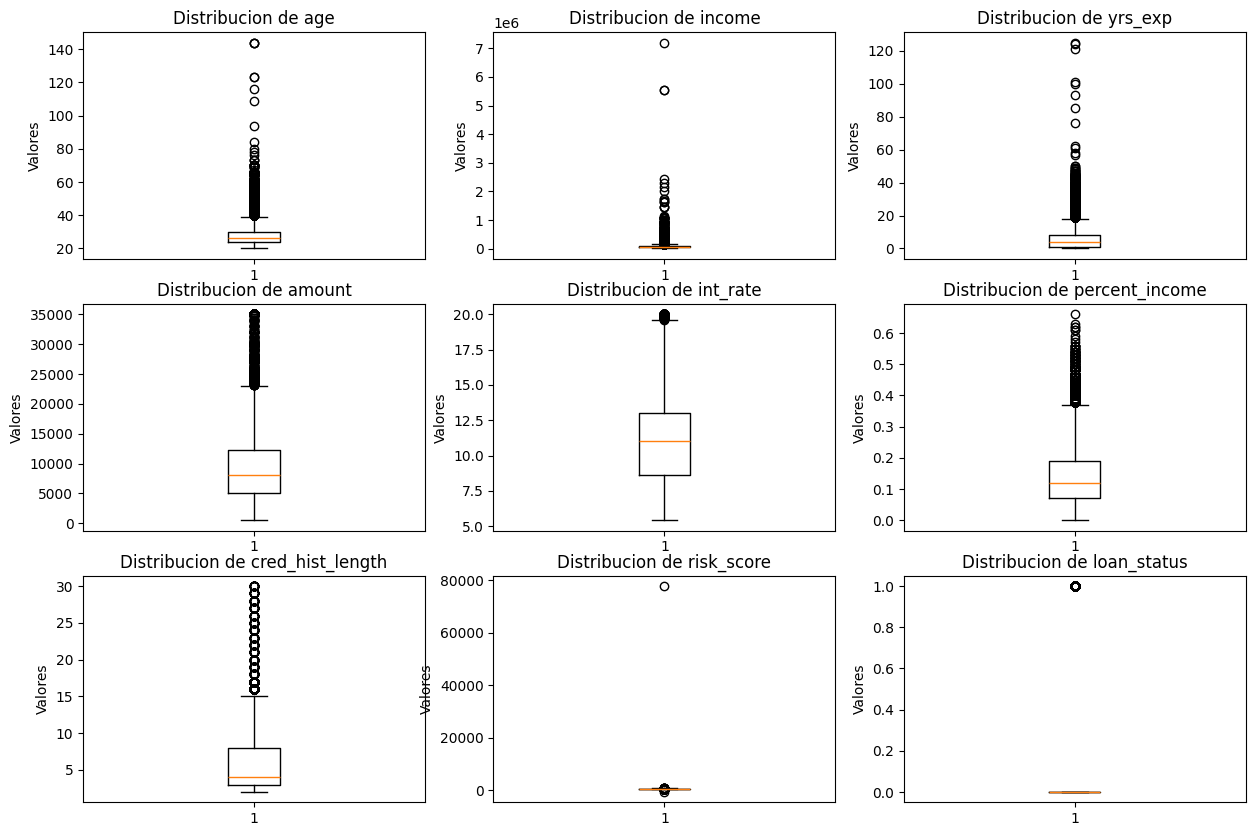

In [58]:
categories = data_clean.select_dtypes(include='number').columns
print(categories)

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

#Graficamos la distribucion de las variables numericas
for i, var in enumerate(categories):
    axes[i].boxplot(data_clean[var])
    axes[i].set_title(f"Distribucion de {var}")
    axes[i].set_ylabel("Valores")

for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.show()

📝 Nota para el cliente: Gracias a estas graficas hemos podido observar que tenemos un par de clientes con edades y años de experiencia laboral comprendidos en un rango que 
que no se ajustan a la realidad, en los siguientes pasos detallaremos el proceso de limpieza de dichos datos.
- Ya que son pocos datos respecto al total de filas hemos decidido lo siguiente:
1. La edad maxima de los clientes sera de 100 años
2. Los años de experiencia laboral maxima seran de 51 años (Edad minima para entrar a trabajar - Edad de jubilacion) Ej: 67 - 16 = 51 años
3. Eliminamos outliers de la columna de risk-score que desvirtuan la realidad de los datos

In [59]:
#Calculamos el porcentaje de valores atipicos en las columnas age y yrs_exp
total_rows = data_clean.shape[0]

#Obtenemos valores atipicos de la columna risk_score
media_risk_score = data_clean['risk_score'].mean()
std_risk_score = data_clean['risk_score'].std()
outliers = []

for element in data_clean['risk_score'].values:
    z = abs(element - media_risk_score) / std_risk_score
    if z > 2:
        outliers.append(element)

#Calculamos el porcentaje de valores atipicos en las columnas age, yrs_exp y risk_score
total_outliers = (data_clean[data_clean['age'] > 100].shape[0] + data_clean[data_clean['yrs_exp'] > 51].shape[0] + len(outliers)) * 100 / total_rows
print("El total de valores atipicos es: ", round(total_outliers,4), "%")
print("Cantidad de datos antes de la limpieza: ", data_clean.shape)

# Eliminar valores atípicos de las columnas age y yrs_exp
data_clean = data_clean[data_clean['age'] <= 120]
data_clean = data_clean[data_clean['yrs_exp'] <= 51]

#Eliminamos los valores atipicos de la columna risk_score con z-score
data_clean = data_clean[~data_clean['risk_score'].isin(outliers)]

#Corroboramos que se hayan eliminado los valores atipicos
print("Cantidad de datos despues de la limpieza: ", data_clean.shape)

El total de valores atipicos es:  0.0467 %
Cantidad de datos antes de la limpieza:  (44962, 14)
Cantidad de datos despues de la limpieza:  (44948, 14)


 📓 Nota cliente: Antes de continuar desarrollando nuestros modelos, es una buena practica verificar si el Dataframe esta desbalanceado


In [60]:
class_types = data_clean[target].value_counts()
class_proportion = data_clean[target].value_counts(normalize=True) * 100

print("Tipos de clases")
print(class_types)
print("Proporcion de clases")
print(round(class_proportion,2))

Tipos de clases
loan_status
0    34980
1     9968
Name: count, dtype: int64
Proporcion de clases
loan_status
0    77.82
1    22.18
Name: proportion, dtype: float64


📓 Nota cliente: Nos encontramos que el dataframe esta desbalanceado ya que tenemos un 77% de registros de la clase 0 (prestamos no concedidos)
frente a un 22% de la clase 1 (prestamos concedidos)

### Ingeniería de características
Una vez hemos realizado la limpieza de datos vamos a codificar y escalar nuestros datos siguiendo los siguientes pasos:
1. Conversion de columnas categoricas al tipo 'category' y de la columna 'age' a entero

In [61]:
# Convertir la columna age a tipo entero
data_clean['age'] = data_clean['age'].astype(int)
# Convertir todas las columnas categóricas object a tipo category
data_clean[data_clean.select_dtypes(['object']).columns] = data_clean.select_dtypes(['object']).astype('category')
print(data_clean.info())

# #Codificamos las columnas categoricas
gender_map = {'male': 0, 'female': 1}
data_clean['gender_encoded'] = data_clean['gender'].map(gender_map)
data_clean.drop(['gender'], axis=1)

education_map = {'High School': 0, 'Associte': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4}
data_clean['education_encoded'] = data_clean['education'].map(education_map)

# Rellenamos los valores NaN con 0
data_clean['education_encoded'] = data_clean['education_encoded'].fillna(0)
data_clean['education_encoded'] = data_clean['education_encoded'].astype(int)

data_clean.drop(['education'], axis=1)

data_ownership = pd.get_dummies(data_clean['ownership'], prefix='ownership', dtype=int, drop_first=True)
data_clean = pd.concat([data_clean, data_ownership], axis=1)

data_purpose = pd.get_dummies(data_clean['purpose'], prefix='purpose', dtype=int, drop_first=True)
data_clean = pd.concat([data_clean, data_purpose], axis=1)

data_previous_loans = {'No': 0, 'Yes': 1}
data_clean['previous_loans_encoded'] = data_clean['previous_loans'].map(data_previous_loans)
data_clean['previous_loans_encoded'] = data_clean['previous_loans_encoded'].astype(int)

data_encoded = data_clean.drop(['gender','education','ownership', 'purpose', 'previous_loans'], axis=1)

print("Verificamos que todas las columnas sean numericas")
print(data_encoded.info())
print(data_encoded.head())


<class 'pandas.core.frame.DataFrame'>
Index: 44948 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               44948 non-null  int64   
 1   gender            44948 non-null  category
 2   education         44948 non-null  category
 3   income            44948 non-null  float64 
 4   yrs_exp           44948 non-null  int64   
 5   ownership         44948 non-null  category
 6   amount            44948 non-null  float64 
 7   purpose           44948 non-null  category
 8   int_rate          44948 non-null  float64 
 9   percent_income    44948 non-null  float64 
 10  cred_hist_length  44948 non-null  float64 
 11  risk_score        44948 non-null  int64   
 12  previous_loans    44948 non-null  category
 13  loan_status       44948 non-null  int64   
dtypes: category(5), float64(5), int64(4)
memory usage: 3.6 MB
None
Verificamos que todas las columnas sean numericas
<class 'pa

#### Nota para el cliente: Para codificar las columnas categoricas hemos seguido los siguientes tecnicas:

|Columna  | Método de codificación | Explicación | 
|--|--|--|
| gender	 | Codificación binaria | Solo dos valores, se puede mapear a 0 y 1. |
| education	| Codificación ordinal | Tiene un orden implícito (ej. High School < Doctorate). |
| ownership		 | One-Hot Encoding |No hay un orden natural, se codifica con columnas binarias.|
| purpose| One-Hot Encoding| No hay un orden natural, se codifica con columnas binarias. |
| previous_loans| Codificación binaria|Solo dos valores, se puede mapear a 0 y 1.|



### Seleccion de caracteristicas
En esta seccion vamos a elegir las columnas que son mas relevantes con el valor target, creando un mapa de correlacion
Este mapa nos mostrará de forma gráfica las dependencias entre las diferentes
variables
- Una correlación alta (cercana a 1) entre dos variables indicará que cuando una aumenta la otra también lo hace
- También tenemos que tener en cuenta la correlación inversa(cercana a -1) cuando una aumenta la otra desciende

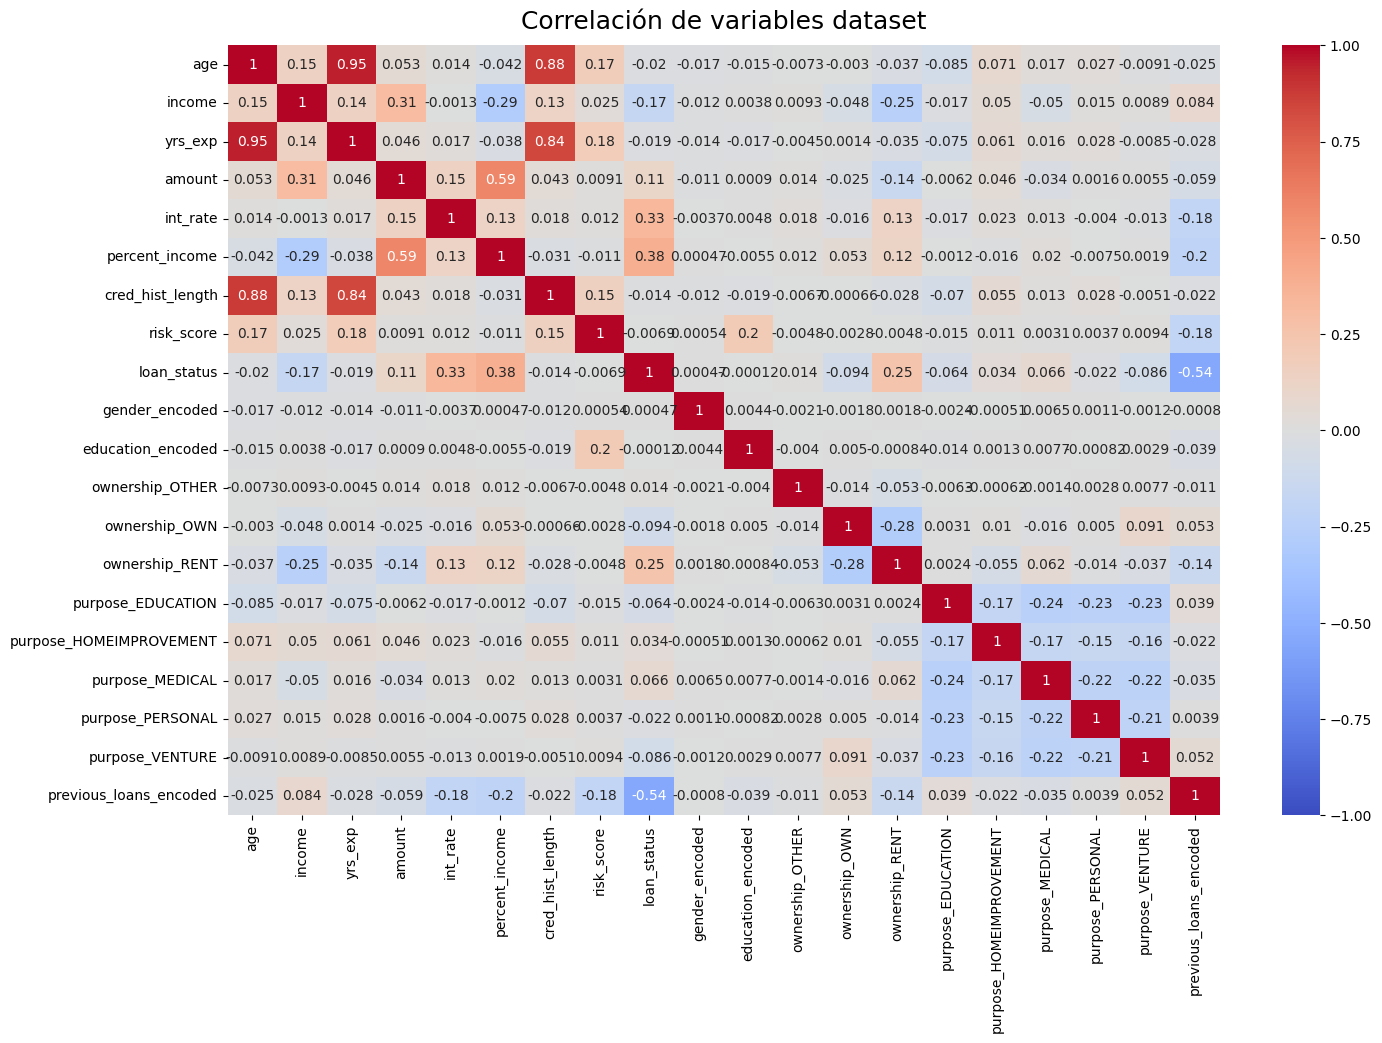

In [62]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(data_encoded.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlación de variables dataset', fontdict={'fontsize': 18}, pad=12)
plt.show()


Una vez observado el grafico, hacemos una seleccion de las columnas mas relevantes con cada uno de nuestros target o valores predictores, en este caso seleccionaremos las siguientes columnas para los modelos:
- Modelos de clasificacion:
1. income
2. amount
3. int_rate
4. percent_income
5. ownership_RENT
6. previous_loans_encoded

- Modelos de regresion:
1. age
2. yrs_exp
3. cred_hist_length
4. education_encoded
5. previous_loans_encoded

In [63]:

relevant_columns_regresion = ['age', 'yrs_exp', 'cred_hist_length','education_encoded','previous_loans_encoded']
data_regresion = data_encoded[relevant_columns_regresion + [target_regresion]]

relevant_columns = ['income', 'amount', 'int_rate','percent_income','ownership_RENT','previous_loans_encoded']
data_encoded = data_encoded[relevant_columns + [target]]

print("Columnas relevantes classificacion")
print(data_encoded.head())
print(data_encoded.info())

print("Columnas relevantes regresion")
print(data_regresion.head())
print(data_regresion.info())

#Escalamos las variables numericas
scaler = StandardScaler()
data_encoded[['income', 'amount', 'int_rate', 'percent_income']] = scaler.fit_transform(data_encoded[['income', 'amount', 'int_rate', 'percent_income']])

print("Columnas escaladas")
print(data_encoded.head())

Columnas relevantes classificacion
    income   amount  int_rate  percent_income  ownership_RENT  \
0  71948.0  35000.0     16.02            0.49               1   
1  12282.0   1000.0     11.14            0.08               0   
2  12438.0   5500.0     12.87            0.44               0   
3  79753.0  35000.0     15.23            0.44               1   
4  66135.0  35000.0     14.27            0.53               1   

   previous_loans_encoded  loan_status  
0                       0            1  
1                       1            0  
2                       0            1  
3                       0            1  
4                       0            1  
<class 'pandas.core.frame.DataFrame'>
Index: 44948 entries, 0 to 44999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   income                  44948 non-null  float64
 1   amount                  44948 non-null  float64
 2   int_rate

Nota: "Una vez tenemos las columnas mas relevantes respecto a nuestro valor target u objetivo, es una buena practica ver el comportamiento individual de cada una de estas respecto del target"

Text(0.5, 1.0, 'Distribución de valores de loan_status')

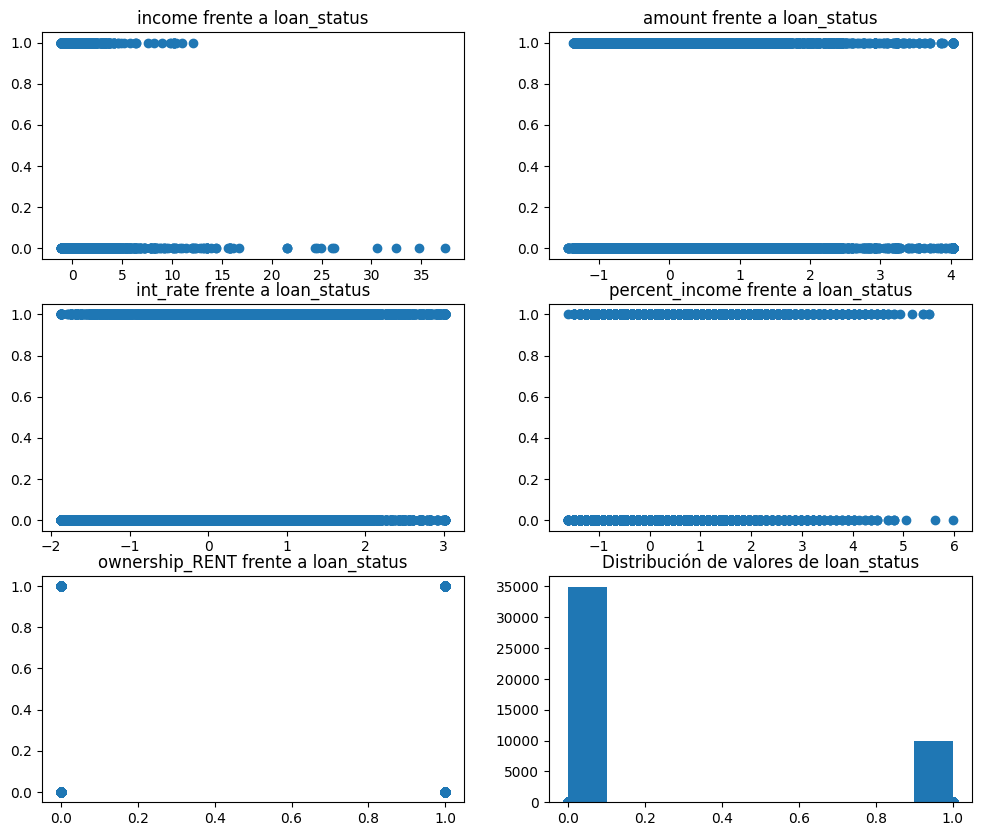

In [64]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
for i in range(0, len(relevant_columns)):
 fila = i // 2
 columna = i % 2
 ax[fila, columna].scatter(x = data_encoded[relevant_columns[i]],
 y = data_encoded[target])
 ax[fila, columna].set_title(relevant_columns[i] + " frente a " + target)
ax[2, 1].hist(data_encoded[target], bins=10)
ax[2, 1].set_title("Distribución de valores de " + target)

#### 🧠Entrenamos un ejemplo de red neuronal (sin balancear el dataset)

In [65]:
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import setuptools.dist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input 

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
validation_split=0.2, verbose=1)

Epoch 1/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8112 - loss: 0.4179 - val_accuracy: 0.8932 - val_loss: 0.2359
Epoch 2/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8958 - loss: 0.2307 - val_accuracy: 0.8968 - val_loss: 0.2276
Epoch 3/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9000 - loss: 0.2182 - val_accuracy: 0.8961 - val_loss: 0.2243
Epoch 4/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9013 - loss: 0.2171 - val_accuracy: 0.8939 - val_loss: 0.2228
Epoch 5/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9038 - loss: 0.2095 - val_accuracy: 0.8977 - val_loss: 0.2230
Epoch 6/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9055 - loss: 0.2099 - val_accuracy: 0.8975 - val_loss: 0.2207
Epoch 7/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9043 - loss: 0.2092 - val_accuracy: 0.8993 - val_loss: 0.2190
Epoch 8/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9069 - loss: 0.2049 - val_accuracy: 0.

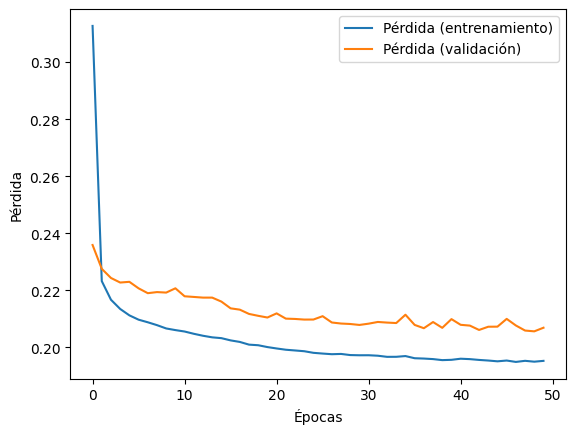

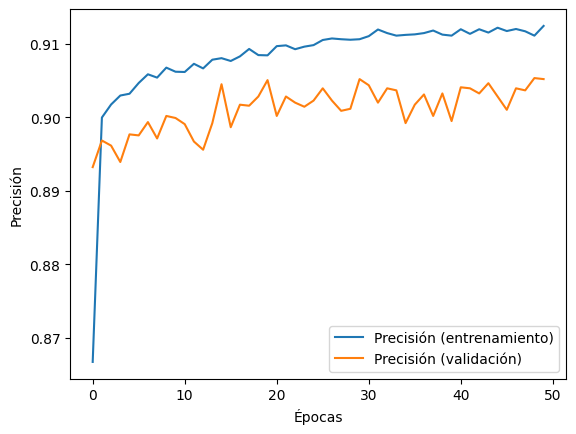

In [67]:
import matplotlib.pyplot as plt 
 
# Pérdida 
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)') 
plt.plot(history.history['val_loss'], label='Pérdida (validación)') 
plt.xlabel('Épocas') 
plt.ylabel('Pérdida') 
plt.legend() 
plt.show() 
 
# Precisión 
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)') 
plt.plot(history.history['val_accuracy'], label='Precisión (validación)') 
plt.xlabel('Épocas') 
plt.ylabel('Precisión') 
plt.legend() 
plt.show() 

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      7329
           1       0.71      0.86      0.77      1661

    accuracy                           0.91      8990
   macro avg       0.84      0.89      0.86      8990
weighted avg       0.92      0.91      0.91      8990



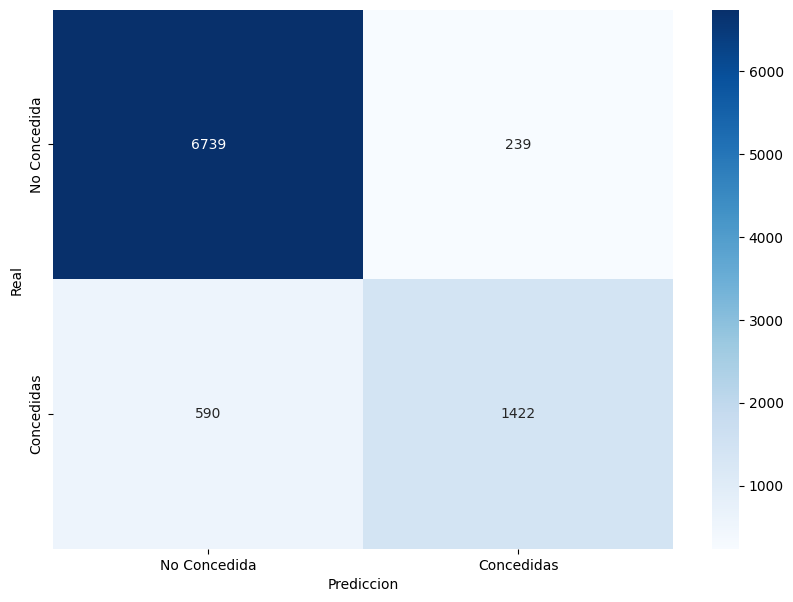

In [68]:
# Matriz de confusion de la red neuronal 

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

y_pred_class = np.where(y_pred > 0.5, 1, 0)

print(classification_report(y_pred_class, y_test.astype(int)))
# print("Score Test: ", model.score(X_test, y_test.astype(int)))
# print("Score Train: ", model.score(X_train, y_train.astype(int)))

conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Concedida', 'Concedidas'], yticklabels=['No Concedida', 'Concedidas'])
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.show()

#### ⚖ Balanceamos el dataset

In [69]:
# Balanceamos el dataset con SMOTE

class_types = data_clean[target].value_counts()
class_proportion = data_clean[target].value_counts(normalize=True) * 100

print("Tipos de clases")
print(class_types)
print("Proporcion de clases")
print(round(class_proportion,2))

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X, y)
class_types_res = pd.Series(y_res).value_counts()
class_proportion = data_clean[target].value_counts(normalize=True) * 100

print("Tipos de clases despues del balanceo")
print("Número de muestras despues del balanceo: ", len(X_res))
print("Tipos de clases despues del balanceo")
print(class_types_res)
print(round(class_proportion,2))


Tipos de clases
loan_status
0    34980
1     9968
Name: count, dtype: int64
Proporcion de clases
loan_status
0    77.82
1    22.18
Name: proportion, dtype: float64
Tipos de clases despues del balanceo
Número de muestras despues del balanceo:  69960
Tipos de clases despues del balanceo
loan_status
1    34980
0    34980
Name: count, dtype: int64


#### 🧠 Entrenamiento de la red neuronales (despues del balance del dataset)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
validation_split=0.2, verbose=1)

Epoch 1/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7719 - loss: 0.4387 - val_accuracy: 0.8713 - val_loss: 0.2687
Epoch 2/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8808 - loss: 0.2544 - val_accuracy: 0.8729 - val_loss: 0.2617
Epoch 3/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8772 - loss: 0.2525 - val_accuracy: 0.8717 - val_loss: 0.2588
Epoch 4/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8790 - loss: 0.2460 - val_accuracy: 0.8718 - val_loss: 0.2576
Epoch 5/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8764 - loss: 0.2487 - val_accuracy: 0.8724 - val_loss: 0.2561
Epoch 6/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8768 - loss: 0.2476 - val_accuracy: 0.8723 - val_loss: 0.2571
Epoch 7/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8772 - loss: 0.2480 - val_accuracy: 0.8735 - val_loss: 0.2551
Epoch 8/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8815 - loss: 0.2425 - 

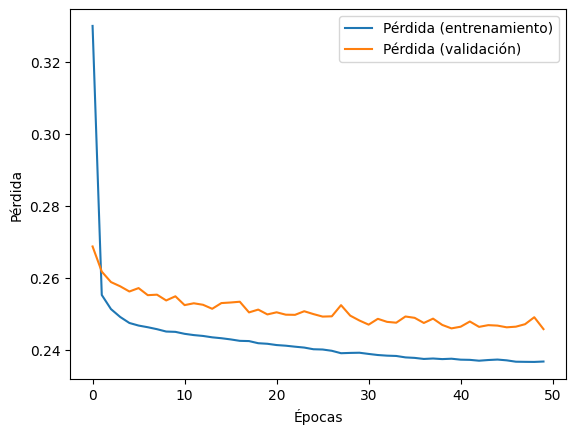

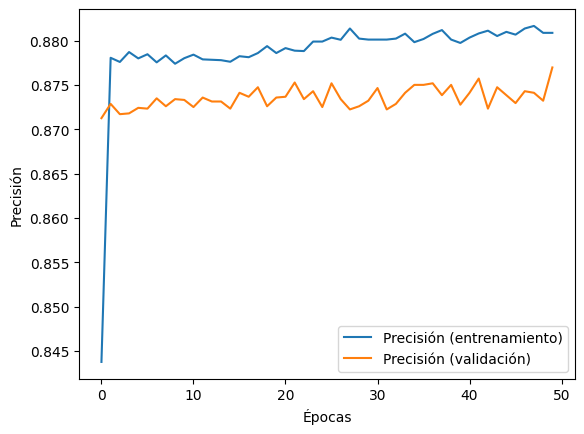

In [72]:
# Pérdida 
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)') 
plt.plot(history.history['val_loss'], label='Pérdida (validación)') 
plt.xlabel('Épocas') 
plt.ylabel('Pérdida') 
plt.legend() 
plt.show() 
 
# Precisión 
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)') 
plt.plot(history.history['val_accuracy'], label='Precisión (validación)') 
plt.xlabel('Épocas') 
plt.ylabel('Precisión') 
plt.legend() 
plt.show() 

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      6673
           1       0.90      0.86      0.88      7319

    accuracy                           0.88     13992
   macro avg       0.88      0.88      0.88     13992
weighted avg       0.88      0.88      0.88     13992



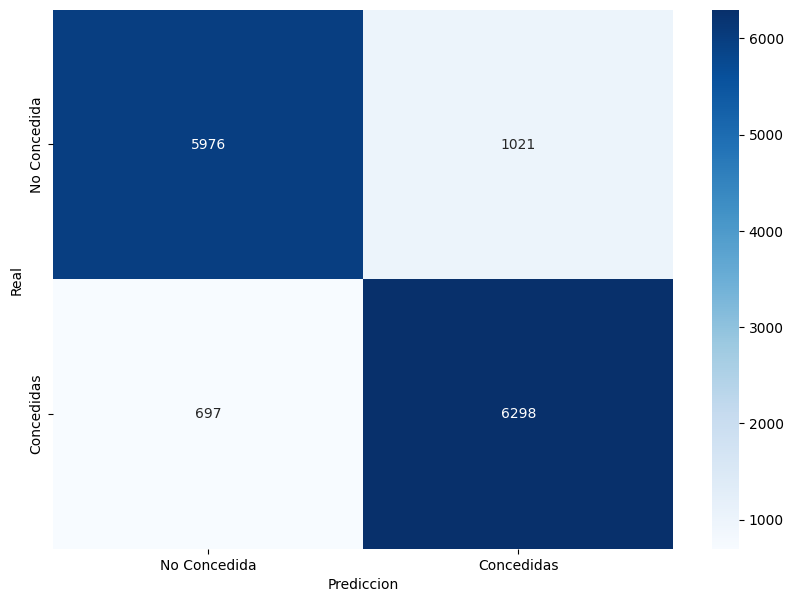

In [73]:
# Matriz de confusion de la red neuronal 

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

y_pred_class = np.where(y_pred > 0.5, 1, 0)

print(classification_report(y_pred_class, y_test.astype(int)))
# print("Score Test: ", model.score(X_test, y_test.astype(int)))
# print("Score Train: ", model.score(X_train, y_train.astype(int)))

conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Concedida', 'Concedidas'], yticklabels=['No Concedida', 'Concedidas'])
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.show()